<a href="https://colab.research.google.com/github/PolinaGuro/BI_ML_2021/blob/master/HW1_ML_Guro_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import pandas as pd


from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
#from knn import KNNClassifier
#from metrics import binary_classification_metrics, multiclass_accuracy

In [ ]:
plt.rcParams["figure.figsize"] = 12, 9
sns.set_style("whitegrid")

SEED = 111
random.seed(SEED)
np.random.seed(SEED)

In [ ]:
import numpy as np


class KNNClassifier:
    """
    K-neariest-neighbor classifier using L1 loss
    """
    
    def __init__(self, k=1):
        self.k = k
    

    def fit(self, X, y):
        self.train_X = X
        self.train_y = y


    def predict(self, testData, n_loops=1):
        
        if n_loops == 0:
            distances = self.compute_distances_no_loops(testData)
        elif n_loops == 1:
            distances = self.compute_distances_one_loop(testData)
        else:
            distances = self.compute_distances_two_loops(testData)
        
        if len(np.unique(self.train_y)) == 2:
          return self.predict_labels_binary(distances)
        else:
          return self.predict_labels_multiclass(distances)


    def compute_distances_two_loops(self, X_test):
        
        num_test = len(X_test)
        num_train = len(self.train_X)
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
          for j in range(num_train):
            dists[i, j] = np.sqrt(np.sum(np.square(self.train_X[j,:] - X_test[i,:]))) # this!
        return dists
        
        pass


    def compute_distances_one_loop(self, X_test):
        
        num_test = len(X_test)
        num_train = len(self.train_X)
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
          dists[i] = np.sqrt(np.sum(np.square(self.train_X - X_test[i,:]), axis = 1)) # this
        return dists
        pass


    def compute_distances_no_loops(self, X_test):
        

        num_test = len(X_test)
        num_train = len(self.train_X)
        dists = np.zeros((num_test, num_train))
        dists = np.sqrt((X_test**2).sum(axis=1)[:, np.newaxis]
            + (self.train_X**2).sum(axis=1)
            - 2 * X_test.dot(self.train_X.T))
        return dists
        pass


    def predict_labels_binary(self, distances):
        

        n_train = distances.shape[1]
        n_test = distances.shape[0]
        prediction = np.zeros(n_test)

        numberOfClasses = 2
        for i in range(n_test):
          arr_ind = np.argsort(distances[i, :])
          labels = self.train_y[arr_ind[0:self.k]]
          #вектор из количеств каждого класса в labels
          label_sum = np.zeros(numberOfClasses)
          for j in range(numberOfClasses):
          # для каждого класса делаем вектор bool а потом суммируем как int
            label_sum[j] = sum(labels == j)
          #индекс максимального элемента label_sum
          prediction[i] = np.argmax(label_sum)
        return prediction
        pass


    def predict_labels_multiclass(self, distances):
        

        n_train = distances.shape[0]
        n_test = distances.shape[0]
        prediction = np.zeros(n_test, np.int)

        # ддлина вектора уникальных значиений y_train (меток класса)
        numberOfClasses = (np.unique(self.train_y)).shape[0]
        for i in range(n_test):
          arr_ind = np.argsort(distances[i, :])
          labels = self.train_y[arr_ind[0:self.k]]
          #вектор из количеств каждого класса в labels
          label_sum = np.zeros(numberOfClasses)
          for j in range(numberOfClasses):
          # для каждого класса делаем вектор bool а потом суммируем как int
            label_sum[j] = sum(labels == j)
          #индекс максимального элемента label_sum
          prediction[i] = np.argmax(label_sum)
        return prediction
        pass

In [ ]:
def binary_classification_metrics(Mod, Exp):

  tp = 0; fp = 0; fn = 0; tn = 0
  for i in range(Mod.shape[0]):
    if Mod[i] == 0 and Exp[i] == 0:
      tn = tn + 1
    elif Mod[i] == 0 and Exp[i] == 1:
      fn = fn + 1
    elif Mod[i] == 1 and Exp[i] == 0:
      fp = fp + 1
    else:
      tp = tp + 1
  if not (tp + fp == 0):
    precision = tp / (tp + fp)
  else:
    precision = 0
  if not (tp + fn == 0):  
    recall = tp / (tp + fn)
  else:
    recall = 0
  if not (precision + recall == 0):  
    F1 = 2 * (precision * recall) / (precision + recall)
  else:
    F1 = 0
  if not (tp + fn + fp + tn == 0):  
    accuracy = (tp + tn) / (tp + fn + fp + tn)
  else:
    accuracy = 0

  return precision, recall, F1, accuracy
  pass


def multiclass_accuracy(Mod, Exp):
  num_Classes = np.size(np.unique(Exp))
  arr = np.zeros((num_Classes, num_Classes))
  for i in range(np.size(Mod, 0)):
    arr[np.int16(Mod[i]), np.int16(Exp[i])] = arr[np.int16(Mod[i]), np.int16(Exp[i])] + 1
  precision = np.zeros(num_Classes)
  for i in range(np.size(precision, 0)):
    if not (np.sum(arr[i, :]) == 0):
      precision[i] = arr[i,i] / np.sum(arr[i, :])
    else:
      precision[i] = 0
      
  recall = np.zeros(num_Classes)
  for i in range(np.size(recall, 0)):
    if not (np.sum(arr[:, i]) == 0):
      recall[i] = arr[i,i] / np.sum(arr[:, i])
    else:
      recall[i] = 0
  return precision
  pass


def r_squared(y_pred, y_true):
  mean_y_true = np.mean(y_true)
  r_sq = 1 - np.sum((y_pred - y_true)**2)/np.sum((y_true - mean_y_true)**2)
  pass


def mse(y_pred, y_true):
  mse = np.sum((y_pred - y_true)**2)/y_true.shape[0]
  pass


def mae(y_pred, y_true):
  mae = np.sum(np.abs(y_pred - y_true))/y_true.shape[0]
  pass

In [ ]:
X, y = fetch_openml(name="Fashion-MNIST", return_X_y=True, as_frame=False)

In [ ]:
idx_to_stay = np.random.choice(np.arange(X.shape[0]), replace=False, size=1000)
X = X[idx_to_stay]
y = y[idx_to_stay]

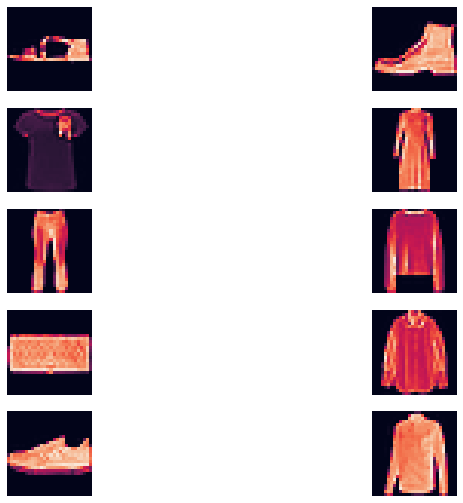

In [ ]:
#test 1.1
tmp = [];
tmp2 = [];
for i in range(1000):
  if not y[i] in tmp2:
    tmp2.append(y[i])
    tmp.append(i)
  if len(tmp) == 10:
    break
for i in range(10):
  plt.subplot(5, 2, i+1)
  image = X[tmp[i]].reshape(28, 28)
  plt.imshow(image)
  plt.axis("off");


In [ ]:
# test  1.2
import collections
collections.Counter(y)

Counter({'0': 93,
         '1': 102,
         '2': 95,
         '3': 121,
         '4': 96,
         '5': 98,
         '6': 101,
         '7': 79,
         '8': 109,
         '9': 106})

In [ ]:
#test 1.3
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.67, 
                                                    random_state=42)

In [ ]:
#test 1.4
#from sklearn.neighbors import KNeighborsClassifier
cnt_test = collections.Counter(y_test)
cnt_train = collections.Counter(y_train)
binary_train_y = np.zeros(cnt_train['0']+cnt_train['1']); binary_train_X = np.zeros((cnt_train['0']+cnt_train['1'], np.size(X_train, 1)))
binary_test_X = np.zeros((cnt_test['0']+cnt_test['1'], np.size(X_test, 1))); binary_test_y = np.zeros(cnt_test['0']+cnt_test['1'])
trn_it = 0; tst_it = 0
for i in range(len(y_train)):
  if y_train[i] == '0' or y_train[i] == '1':
    binary_train_y[trn_it] = y_train[i]
    binary_train_X[trn_it] = X_train[i]
    trn_it = trn_it + 1
for i in range(len(y_test)):
  if y_test[i] == '0' or y_test[i] == '1':
    binary_test_y[tst_it] = (y_test[i])
    binary_test_X[tst_it] = (X_test[i])
    tst_it = tst_it + 1
#knn_classifier  = KNeighborsClassifier(n_neighbors = 1)
#knn_classifier .fit(binary_train_X , binary_train_y)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
def find_best_k(X_train, y_train, X_test, y_test, params, metric):
  train_metrics = np.zeros(len(params));  test_metrics = np.zeros(len(params))
  
  for k in range(len(params)):
    knn = KNNClassifier(params[k])
    knn.fit(X_train, y_train)
    prediction_test = knn.predict(X_test)
    precision, recall, F1, accuracy = binary_classification_metrics(prediction_test, y_test)
    if metric == 'precision':
      test_metrics[k] = precision
    elif metric == 'recall':
      test_metrics[k] = recall
    elif metric == 'F1':
      test_metrics[k] = F1
    elif metric == 'accuracy':
      test_metrics[k] = accuracy

    prediction_train = knn.predict(X_train)
    precision, recall, F1, accuracy = binary_classification_metrics(prediction_train, y_train)
    if metric == 'precision':
      train_metrics[k] = precision
    elif metric == 'recall':
      train_metrics[k] = recall
    elif metric == 'F1':
      train_metrics[k] = F1
    elif metric == 'accuracy':
      train_metrics[k] = accuracy
  return train_metrics, test_metrics
params = [1, 2, 4, 5, 8, 10, 30]
train_metrics, test_metrics = find_best_k(binary_train_X, binary_train_y, binary_test_X, binary_test_y, params, 'F1')

In [ ]:
print(test_metrics)

[1.         0.96666667 0.98360656 0.98360656 0.96666667 0.96666667
 0.92063492]


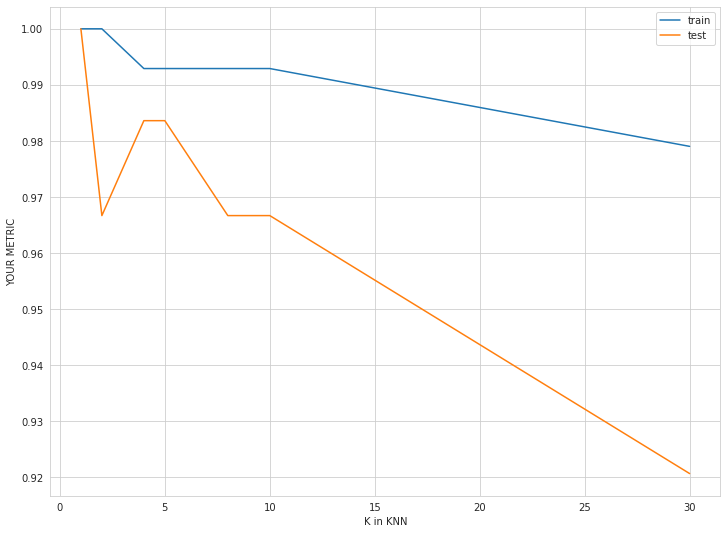

In [ ]:
plt.plot(params, train_metrics, label="train")
plt.plot(params, test_metrics, label="test")
plt.legend()
plt.xlabel("K in KNN")
plt.ylabel("YOUR METRIC");

In [ ]:
knn_classifier = KNNClassifier(k=1)
knn_classifier.fit(X_train, y_train)
predictions = knn_classifier.predict(X_test)